# Goal of the case study You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams #for resizing images
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [3]:
dict_df=pd.read_excel("data_dictionary.xlsx","data_dictionary")
esd_df=pd.read_csv("employee_survey_data.csv")
gd_df=pd.read_csv("general_data.csv")
msd_df=pd.read_csv("manager_survey_data.csv")
in_df=pd.read_csv("in_time.csv")
out_df=pd.read_csv("out_time.csv")


In [167]:
dict_df

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [99]:
esd_df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


In [5]:
esd_df.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


In [6]:
esd_df.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [7]:
#since record has some null values, lets fill them as 0 so it cant affect the data consistency.
esd_df.fillna(0,inplace=True)

In [8]:
esd_df.isnull().sum() # all NaN values are made as 0

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [9]:
esd_df.head(20)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


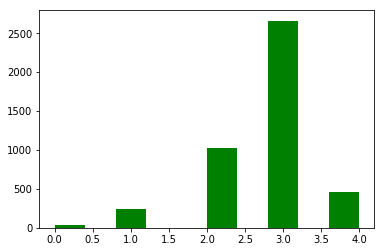

In [10]:
plt.hist(esd_df["WorkLifeBalance"],color="g")# it shows max employees rate the worklife balance as 0-3.
plt.show()

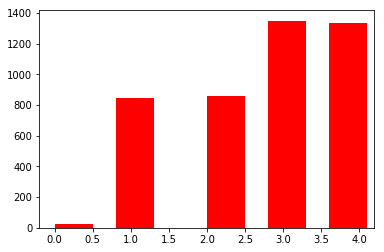

In [11]:
plt.hist(esd_df["EnvironmentSatisfaction"],color='r',width=0.5)
plt.show()
#most of the employees are satisfied with work environment

# General Data 

In [12]:
gd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [13]:
gd_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [14]:
gd_df.PercentSalaryHike.max(),gd_df.PercentSalaryHike.min(),gd_df.PercentSalaryHike.mean()
# max hike is 25%, min hike 11%,Average hike in the firm is 15 %
hike_data =[gd_df.PercentSalaryHike.max(),gd_df.PercentSalaryHike.min(),gd_df.PercentSalaryHike.mean()]
hike_data

[25, 11, 15.209523809523809]

In [15]:
gd_df[gd_df["PercentSalaryHike"]==25].count() # 54 people got max hike


Age                        54
Attrition                  54
BusinessTravel             54
Department                 54
DistanceFromHome           54
Education                  54
EducationField             54
EmployeeCount              54
EmployeeID                 54
Gender                     54
JobLevel                   54
JobRole                    54
MaritalStatus              54
MonthlyIncome              54
NumCompaniesWorked         54
Over18                     54
PercentSalaryHike          54
StandardHours              54
StockOptionLevel           54
TotalWorkingYears          54
TrainingTimesLastYear      54
YearsAtCompany             54
YearsSinceLastPromotion    54
YearsWithCurrManager       54
dtype: int64

In [16]:
gd_df[gd_df["PercentSalaryHike"]==11].count() # 630 employees get minimum hike

Age                        630
Attrition                  630
BusinessTravel             630
Department                 630
DistanceFromHome           630
Education                  630
EducationField             630
EmployeeCount              630
EmployeeID                 630
Gender                     630
JobLevel                   630
JobRole                    630
MaritalStatus              630
MonthlyIncome              630
NumCompaniesWorked         628
Over18                     630
PercentSalaryHike          630
StandardHours              630
StockOptionLevel           630
TotalWorkingYears          630
TrainingTimesLastYear      630
YearsAtCompany             630
YearsSinceLastPromotion    630
YearsWithCurrManager       630
dtype: int64

In [17]:
gd_df.count() # total employees as 4410

Age                        4410
Attrition                  4410
BusinessTravel             4410
Department                 4410
DistanceFromHome           4410
Education                  4410
EducationField             4410
EmployeeCount              4410
EmployeeID                 4410
Gender                     4410
JobLevel                   4410
JobRole                    4410
MaritalStatus              4410
MonthlyIncome              4410
NumCompaniesWorked         4391
Over18                     4410
PercentSalaryHike          4410
StandardHours              4410
StockOptionLevel           4410
TotalWorkingYears          4401
TrainingTimesLastYear      4410
YearsAtCompany             4410
YearsSinceLastPromotion    4410
YearsWithCurrManager       4410
dtype: int64

In [96]:
#employees count xwith high,low and avegare hike
Employee_hike=[54,630,4410-684]
Employee_hike

[54, 630, 3726]

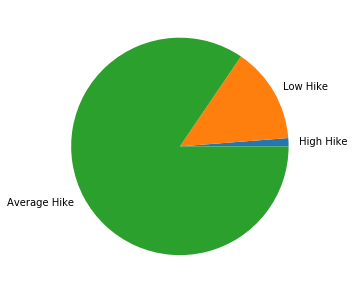

In [98]:
plt.pie(Employee_hike,labels=("High Hike","Low Hike","Average Hike"))
plt.show()

In [28]:
# lets check attrition rate
gd_df[gd_df.Attrition=="Yes"]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2
35,26,Yes,Travel_Rarely,Research & Development,8,3,Medical,1,36,Male,...,1.0,Y,12,8,2,8.0,5,8,7,4
38,18,Yes,Travel_Rarely,Research & Development,1,4,Life Sciences,1,39,Male,...,1.0,Y,14,8,2,0.0,3,0,0,0
59,52,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,60,Female,...,2.0,Y,18,8,1,11.0,2,8,7,7
65,28,Yes,Travel_Rarely,Research & Development,9,4,Medical,1,66,Male,...,5.0,Y,14,8,1,5.0,4,3,2,2
69,39,Yes,Travel_Rarely,Research & Development,1,1,Medical,1,70,Female,...,4.0,Y,17,8,1,12.0,0,1,0,0


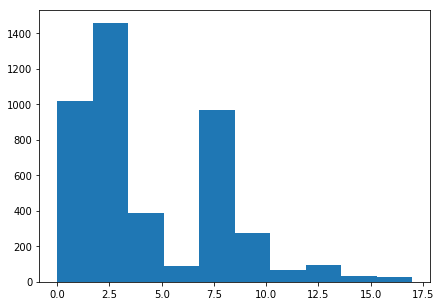

4.12312925170068

In [154]:
#people retrining with same manager # How are the managers??
plt.hist(gd_df.YearsWithCurrManager)
plt.show()
gd_df.YearsWithCurrManager.mean()

Text(0, 0.5, 'years since last promotion')

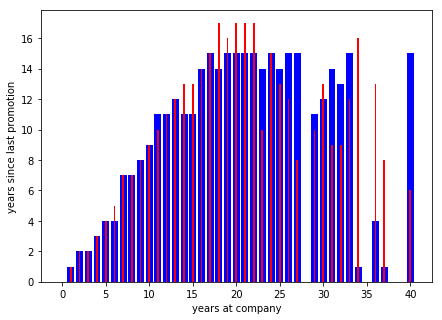

In [166]:
#how is promotion scope?
plt.bar(gd_df.YearsAtCompany,gd_df.YearsSinceLastPromotion,color="b")
plt.bar(gd_df.YearsAtCompany,gd_df.YearsWithCurrManager,color="r",width = 0.2)
plt.xlabel("years at company")
plt.ylabel("years since last promotion")

In [93]:
#lets check the old employees
gd_df[gd_df["YearsAtCompany"]>8].EmployeeCount.count()  #count is 1344

1344

In [20]:
Male=gd_df[gd_df.Gender=="Male"]
Female=gd_df[gd_df.Gender=="Female"]

In [29]:
#Female and Male employee
employee_ratio=[Female.Gender.count(),Male.Gender.count()]
employee_ratio

[1764, 2646]

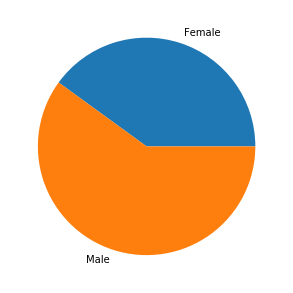

In [49]:
#plot to show Male and Female ratio in the firm
plt.pie(employee_ratio,labels=["Female","Male"],colors=None)
plt.show()

In [22]:
gd_df.Department.unique() # various departments in the firm

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [23]:
depgrp=gd_df.groupby("Department")
depgrp

In [71]:
#Splitting the data as per departments
sales_dep=depgrp.get_group("Sales")
RD_dep=depgrp.get_group("Research & Development")
HR_dep=depgrp.get_group("Human Resources")

sales_dep.EmployeeCount.count(),RD_dep.EmployeeCount.count(),HR_dep.EmployeeCount.count()


(1338, 2883, 189)

In [78]:
#Attrition in different departments
Attrition_sales=sales_dep[sales_dep.Attrition=="No"]
Attrition_RD=RD_dep[RD_dep.Attrition=="No"]
Attrition_HR=HR_dep[HR_dep.Attrition=="No"]

Attrtion_rate=[Attrition_sales.EmployeeCount.count()/sales_dep.EmployeeCount.count(),Attrition_RD.EmployeeCount.count()/RD_dep.EmployeeCount.count(),Attrition_HR.EmployeeCount.count()/HR_dep.EmployeeCount.count()]
Attrtion_rate 
# 201 are  YES part of attrition, 1137 are No


[0.8497757847533632, 0.8428720083246618, 0.6984126984126984]

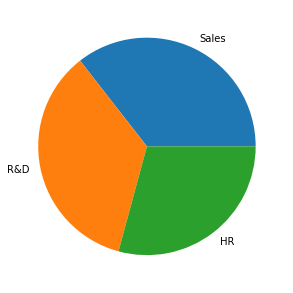

In [88]:
#lets see the employee retention as per the department
plt.pie(Attrtion_rate,labels=("Sales","R&D","HR"))
plt.show()

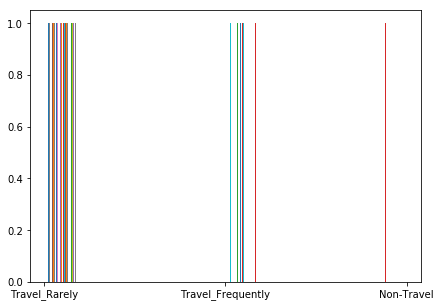

In [91]:
rcParams['figure.figsize']=7,5  # increase the size of diagram on jupyter notebook.
plt.hist(sales_dep.BusinessTravel)
plt.show()

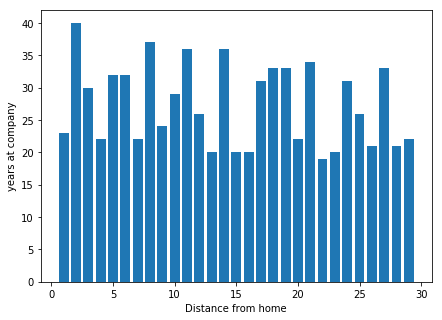

9.19251700680272

In [151]:
#lest see attrition rate in the group dataset
gd_df.head()
#female_emp=gd_df[gd_df.Gender=="Female"]

plt.xlabel("Distance from home")
plt.ylabel("years at company")
plt.bar(gd_df.DistanceFromHome,gd_df.YearsAtCompany)
plt.show()
gd_df.DistanceFromHome.mean()

# Manager seurvey Data

In [123]:
msd_df

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


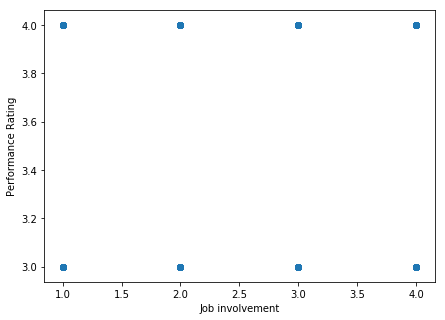

In [124]:
#lets plot job involvment and ratings
plt.scatter(msd_df.JobInvolvement,msd_df.PerformanceRating)
plt.xlabel("Job involvement")
plt.ylabel("Performance Rating")
plt.show()

In [127]:
#lets see high performace people of the group with max job involvment
msd_df.JobInvolvement.unique()

array([3, 2, 1, 4], dtype=int64)

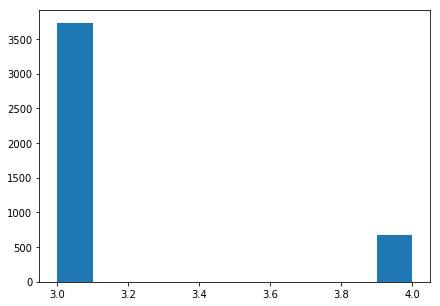

In [168]:
plt.hist(msd_df.PerformanceRating,bins=None)
plt.show()

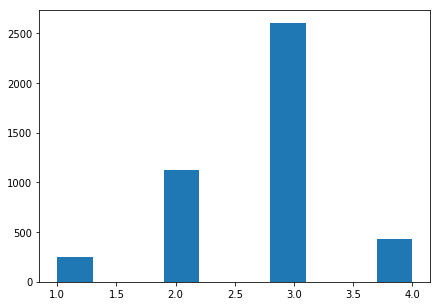

In [135]:
plt.hist(msd_df.JobInvolvement,bins=None) #employee job involvement
plt.show()